# Sentiment Analysis of 2023 Election Tweets

### Case study: To collect past and present data using snscrape module for analysis of people's opinion and sentiment regarding the election and in relation to the top 3 presidential candidates from the political party APC, PDP and Labour party 

#### Outline of notebook
1. Case study
2. Data gathering
3. Data wrangling
4. Data Preprocessing
5. Sentiment Analysis
6. Data Visualization

Note: The wrangling process is scattered so watch the comments to see where they took place

### Data Gathering
A total amount of 58,633 data was collected from 1/January/2022 to 30/July/2022. This data yield for each month differed as some months didn't have up to the 20,000 limit set in the code while some had past that.

In [1]:
#libraries needed
import pandas as pd
import snscrape.modules.twitter as sntwitter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
# nltk.download('stopwords') #run once and comment it out to avoid it downloading multiple times
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import string
import re
import textblob
from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS
from emot.emo_unicode import UNICODE_EMOJI

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer() 

from wordcloud import ImageColorGenerator
from PIL import Image

import warnings
%matplotlib inline

In [2]:
#comment it out once you have gathered your data 
# to avoid running out of the wait time gather the data per month
# query = "(Peter Obi OR Tinubu OR Atiku OR #PeterObiForPresident2023 OR #TinubuForPresident2023 OR #AtikuForPresident2023 OR #BAT2023 OR #Obi2023 OR #Atiku2023 OR #OBIdient OR #Atikulated OR Batified OR PDP OR APC OR LP OR LABOUR PARTY) since:2022-07-01 until:2022-03-30"
# tweets = []
# for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
#     if i>20000:
#         break
#     else:
#         tweets.append([tweet.date, tweet.id, tweet.url, tweet.user.username, tweet.sourceLabel, tweet.user.location, tweet.content, tweet.likeCount, tweet.retweetCount])
# df = pd.DataFrame(tweets, columns = ['Date', 'ID', 'url', 'username', 'source', 'location', 'tweet', 'num_of_likes', 'num_of_retweet'])
# df.to_csv('sentiment.csv', mode = 'a')

In [3]:
df =  pd.read_csv('sentiment.csv', encoding = 'unicode_escape')
df.head(2)

,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_retweet
0,2022-01-01 08:18:23+00:00,1.480000e+18,https://twitter.com/Peter_de_Pagter/status/147...,Peter_de_Pagter,Twitter Web App,"Netherlands, Haarlem",Tunisia: Ennahda says senior party official 'k...,0,0
1,2022-01-01 08:27:53+00:00,1.480000e+18,https://twitter.com/dannypowell67/status/14771...,dannypowell67,Twitter for iPhone,Unknown,"Sir Tony Blair, Sir Keir Starmer, Lord Peter M...",125,39


In [4]:
# one of the wrangling process filling the missing location

In [5]:
df.location.isna().sum()

2811

In [6]:
df['location'] = df['location'].fillna('Unknown')

#### Data preprocessing
This involves this neccessay steps before carrying out the sentiment analysis
To remove the stop words
Removing tags, url links and other unnecessary words
Tokenizing the words
Lemmitizing words

In [7]:
eng_stop_words = list(stopwords.words('english'))

In [8]:
emoji = list(UNICODE_EMOJI.keys())

In [9]:
# function for preprocessing tweet in preparation for sentiment analysis
def ProcessedTweets(text):
    #changing tweet text to small letters
    text = text.lower()
    # Removing @ and links 
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", text).split())
    # removing repeating characters
    text = re.sub(r'\@\w+|\#\w+|\d+', '', text)
    # removing punctuation and numbers
    punct = str.maketrans('', '', string.punctuation+string.digits)
    text = text.translate(punct)
    # tokenizing words and removing stop words from the tweet text
    tokens = word_tokenize(text)  
    filtered_words = [w for w in tokens if w not in eng_stop_words]
    filtered_words = [w for w in filtered_words if w not in emoji]
    # lemmetizing words
    lemmatizer = WordNetLemmatizer() 
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    text = " ".join(lemma_words)
    return text

In [10]:
# Generate a new column called 'Processed Tweets' by applying preprocessed tweets function to the 'Tweet' column.
df['Processed_Tweets'] = df['tweet'].apply(ProcessedTweets)

In [11]:
df.head(5)

,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_retweet,Processed_Tweets
0,2022-01-01 08:18:23+00:00,1.480000e+18,https://twitter.com/Peter_de_Pagter/status/147...,Peter_de_Pagter,Twitter Web App,"Netherlands, Haarlem",Tunisia: Ennahda says senior party official 'k...,0,0,tunisia ennahda say senior party official kidn...
1,2022-01-01 08:27:53+00:00,1.480000e+18,https://twitter.com/dannypowell67/status/14771...,dannypowell67,Twitter for iPhone,Unknown,"Sir Tony Blair, Sir Keir Starmer, Lord Peter M...",125,39,sir tony blair sir keir starmer lord peter man...
2,2022-01-01 10:13:28+00:00,1.480000e+18,https://twitter.com/Value_added/status/1477221...,Value_added,Twitter Web App,Leeds,The Labour Party must now suspend Peter Mandel...,1,1,labour party must suspend peter mandelson via eye
3,2022-01-01 11:25:04+00:00,1.480000e+18,https://twitter.com/dorset_eye/status/14772394...,dorset_eye,Twitter Web App,United Kingdom Dorset,Has the Labour party suspended Peter Mandelson...,34,20,labour party suspended peter mandelson yet
4,2022-01-01 11:37:03+00:00,1.480000e+18,https://twitter.com/susiebrig/status/147724246...,susiebrig,Twitter for Android,"lea, matlock, derbyshire","@ao_thwaites @woodgnomology I agree, as I have...",0,0,thwaites agree remember blair elected amp many...


In [12]:
#another data wrangling process
#replacing some words in the processed tweet
df['Processed_Tweets'] = df['tweet'].replace(to_replace ='parties', value = 'party')
df['Processed_Tweets'] = df['tweet'].replace(to_replace ='Labor party', value = 'Labour party')

In [13]:
#another data wrangling process
# extracting the parties: apc, pdp, labour party and the 3 top candidate name into new columns
def extract_apc(n):
  n = str(n)
  resp = n.lower().find("apc")
  if resp != -1:
    return "APC"
  else:
    return None

def extract_pdp(n):
  n = str(n)
  resp = n.lower().find("pdp")
  if resp != -1:
    return "PDP"
  else:
    return None

def extract_labour(n):
  n = str(n)
  resp = n.lower().find("labour party")
  if resp != -1:
    return "Labour Party"
  else:
    return None

def extract_obi(n):
  n = str(n)
  resp = n.lower().find("obi")
  if resp != -1:
    return "Peter Obi"
  else:
    return None

def extract_atiku(n):
  n = str(n)
  resp = n.lower().find("atiku")
  if resp != -1:
    return "Atiku"
  else:
    return None

def extract_tinubu(n):
  n = str(n)
  resp = n.lower().find("tinubu")
  if resp != -1:
    return "Tinubu"
  else:
    return None


In [14]:
#applying the function
df['Obi'] = df['tweet'].apply(extract_obi) 
df['labour'] = df['tweet'].apply(extract_labour) 
df['pdp'] = df['tweet'].apply(extract_pdp) 
df['apc'] = df['tweet'].apply(extract_apc) 
df['atiku'] = df['tweet'].apply(extract_atiku) 
df['tinubu'] = df['tweet'].apply(extract_tinubu) 

In [15]:
#another data wrangling process
# replacing empty values with Empty
df['Obi'] = df['Obi'].fillna('Empty')
df['labour'] = df['labour'].fillna('Empty')
df['pdp'] = df['pdp'].fillna('Empty')
df['apc'] = df['apc'].fillna('Empty')
df['atiku'] = df['atiku'].fillna('Empty')
df['tinubu'] = df['tinubu'].fillna('Empty')

In [16]:
#another data wrangling process
# convert the tweet text into a string separate with " "
tweets_string = df['Processed_Tweets'].tolist()
tweets_string = " ".join(tweets_string)

#### Sentiment Analysis
To carry this out the polarity score is gotten using the TextBlob library which is usually used for NLP processes. The polarity score tells the level of how good or bad the words used in the tweet are. After the polarity is gotten a condition is set to get the sentiments.

In [17]:
# Function for polarity score
def polarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# Function to get sentiment type
#setting the conditions
def sentimenttextblob(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"  


In [18]:
# using the functions to get the polarity and sentiment
df['Polarity'] = df['Processed_Tweets'].apply(polarity)
df['Sentiment'] = df['Polarity'].apply(sentimenttextblob)
sent = df['Sentiment'].value_counts()
sent

Positive    30103
Neutral     18123
Negative    10407
Name: Sentiment, dtype: int64

#### Data Visualization
The major part of visualization is done in a dashboard on Power BI but some simple visualization were done in this notebook.
Resources on customizing word cloud can be found here https://towardsdatascience.com/how-to-create-beautiful-word-clouds-in-python-cfcf85141214

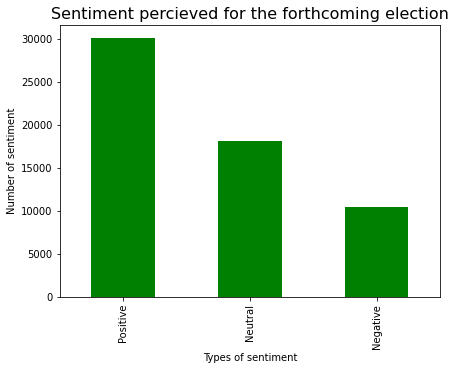

In [19]:
# plotting bar chart for the Sentiment
plt.subplot(1,2,1)
sent.plot(kind='bar', color=['green'], figsize=(15,5))
plt.title('Sentiment percieved for the forthcoming election', fontsize=16)
plt.xlabel('Types of sentiment')
plt.ylabel('Number of sentiment');

In [20]:
df.head(5)

,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_retweet,Processed_Tweets,Obi,labour,pdp,apc,atiku,tinubu,Polarity,Sentiment
0,2022-01-01 08:18:23+00:00,1.480000e+18,https://twitter.com/Peter_de_Pagter/status/147...,Peter_de_Pagter,Twitter Web App,"Netherlands, Haarlem",Tunisia: Ennahda says senior party official 'k...,0,0,Tunisia: Ennahda says senior party official 'k...,Empty,Empty,PDP,Empty,Empty,Empty,0.000,Neutral
1,2022-01-01 08:27:53+00:00,1.480000e+18,https://twitter.com/dannypowell67/status/14771...,dannypowell67,Twitter for iPhone,Unknown,"Sir Tony Blair, Sir Keir Starmer, Lord Peter M...",125,39,"Sir Tony Blair, Sir Keir Starmer, Lord Peter M...",Empty,Labour Party,Empty,Empty,Empty,Empty,0.000,Neutral
2,2022-01-01 10:13:28+00:00,1.480000e+18,https://twitter.com/Value_added/status/1477221...,Value_added,Twitter Web App,Leeds,The Labour Party must now suspend Peter Mandel...,1,1,The Labour Party must now suspend Peter Mandel...,Empty,Labour Party,Empty,Empty,Empty,Empty,0.000,Neutral
3,2022-01-01 11:25:04+00:00,1.480000e+18,https://twitter.com/dorset_eye/status/14772394...,dorset_eye,Twitter Web App,United Kingdom Dorset,Has the Labour party suspended Peter Mandelson...,34,20,Has the Labour party suspended Peter Mandelson...,Empty,Labour Party,Empty,Empty,Empty,Empty,0.000,Neutral
4,2022-01-01 11:37:03+00:00,1.480000e+18,https://twitter.com/susiebrig/status/147724246...,susiebrig,Twitter for Android,"lea, matlock, derbyshire","@ao_thwaites @woodgnomology I agree, as I have...",0,0,"@ao_thwaites @woodgnomology I agree, as I have...",Empty,Labour Party,Empty,Empty,Empty,Empty,0.525,Positive


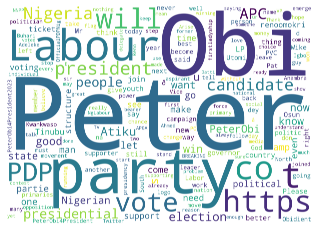

In [21]:
# Displaying the most talked about word in a word cloud 
# some stop words were still evident but was removed during visualization on Power BI
# Instantiate the Twitter word cloud object
w_cloud = WordCloud(collocations = False,max_words=200, background_color = 'white', width = 7000, height = 5000).generate(tweets_string)

# Display the generated Word Cloud
plt.imshow(w_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

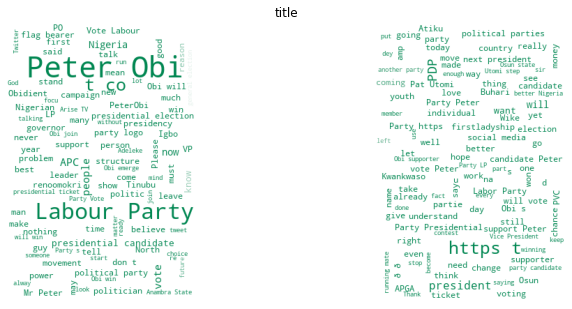

In [22]:
# masking the word cloud into Nigeria's flag colour

#Create the mask
colosseum_mask = np.array(Image.open('/Users/fresh/Documents/Overall python/Twitter project/Flag-Nigeria.jpg'))

#Grab the mask colors
colors = ImageColorGenerator(colosseum_mask)

#Instantiate the wordcloud using color_func argument
cloud = WordCloud(mask=colosseum_mask,
                  background_color='white',
                  color_func=colors).generate_from_text(tweets_string)

#Plot the wordcloud
plt.figure(figsize=(10,8))
plt.imshow(cloud)
plt.axis('off')
plt.title('title')
plt.show()

In [23]:
#saving the word cloud image
# colosseum_mask.to_file("wordcloud.png")

In [24]:
# saving the file used for further used in power bi
# df.to_csv('final_tweet.csv')